In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
og_data = pd.read_excel('loan.xlsx')

Problem : To identify customers likly to default on thier loan.

Approach : Identify the important features from the data that will help in training a logistic regression model to identify defaulters.

In [3]:
og_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          float64
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           datetime64[ns]
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                

Data contain 111 features and 39717 data points, data types are "int" , "float" and "object".
As not all featues are important for model traning we will filter out only the important features, we will do EDA on the dataset to filter out important features.

In [4]:
og_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
og_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,0.118600,280.220000,5.900000e+04,13.400000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.230000e+04,18.600000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Let's convert term and emp length to numeric type

In [6]:
try:
    og_data = pd.read_excel('mark1.xlsx')    
except:
    for i in tqdm((range(len(og_data)))):
         og_data['term'].iloc[i] = [int(s) for s in og_data['term'].iloc[i].split() if s.isdigit()][0]
         if(og_data['emp_length'].iloc[i].find('+') != -1):
            og_data['emp_length'].iloc[i] = int(og_data['emp_length'].iloc[i][0]+og_data['emp_length'].iloc[i][1])
         else:
            og_data['emp_length'].iloc[i] = [int(s) for s in og_data['emp_length'].iloc[i].split() if s.isdigit()][0]

In [7]:
og_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
og_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              int64
int_rate                          float64
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        int64
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           datetime64[ns]
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                  

In [9]:
#count number of missing data
og_data.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          1440
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12495
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
og_data = og_data.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies',], axis=1)

In [11]:
#drop column with all missing data
og_data = og_data[[ cols for cols in og_data if og_data[cols].count() > 0 ]]
og_data.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    47
total_acc                      0
initial_li

#Let's take care of missing values

In [12]:
og_data.dropna(inplace=True)

In [13]:
og_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38475 entries, 0 to 39665
Data columns (total 50 columns):
id                            38475 non-null int64
member_id                     38475 non-null int64
loan_amnt                     38475 non-null int64
funded_amnt                   38475 non-null int64
funded_amnt_inv               38475 non-null float64
term                          38475 non-null int64
int_rate                      38475 non-null float64
installment                   38475 non-null float64
grade                         38475 non-null object
sub_grade                     38475 non-null object
emp_length                    38475 non-null int64
home_ownership                38475 non-null object
annual_inc                    38475 non-null float64
verification_status           38475 non-null object
issue_d                       38475 non-null datetime64[ns]
loan_status                   38475 non-null object
pymnt_plan                    38475 non-null object
u

In [14]:
#drop the irrelevant columns 
#last payment date won't have any relation wheather a person will default or not same with the earliest_cr_line
#I think tax
og_data = og_data.drop(['last_pymnt_d','earliest_cr_line'], axis=1)

In [15]:
#drop columns with 0 values
og_data = og_data.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','delinq_amnt','tax_liens'], axis=1)

In [16]:
og_data = og_data.drop(['id','member_id'],axis=1)
og_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,chargeoff_within_12_mths
count,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,3.847500e+04,38475.000000,38475.000000,...,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.0
mean,11311.444444,11035.738142,10482.199524,42.448031,0.120487,327.251158,5.098428,6.964306e+04,13.338617,0.146693,...,51.206671,12280.333526,11687.558352,9894.787458,2289.284049,1.374316,94.887788,12.353368,2712.289091,0.0
std,7461.485373,7191.910888,7135.743122,10.638542,0.037167,209.116109,3.408905,6.428838e+04,6.663076,0.491918,...,376.020399,9054.068391,8955.809822,7072.270137,2618.143859,7.344227,692.025612,149.652260,4474.103441,0.0
min,500.000000,500.000000,0.000000,36.000000,0.054200,15.690000,1.000000,4.000000e+03,0.000000,0.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0
25%,5600.000000,5500.000000,5000.000000,36.000000,0.093200,168.740000,2.000000,4.152000e+04,8.220000,0.000000,...,0.000000,5643.266006,5222.200000,4800.000000,676.910000,0.000000,0.000000,0.000000,224.040000,0.0
50%,10000.000000,10000.000000,9000.000000,36.000000,0.118600,283.370000,4.000000,6.000000e+04,13.420000,0.000000,...,0.000000,10061.750000,9419.380000,8000.000000,1373.270000,0.000000,0.000000,0.000000,558.590000,0.0
75%,15000.000000,15000.000000,14450.000000,60.000000,0.145900,435.070000,9.000000,8.320000e+04,18.600000,0.000000,...,0.000000,16678.383050,15954.830000,14000.000000,2866.945000,0.000000,0.000000,0.000000,3358.345000,0.0
max,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0


In [17]:
og_data.drop('chargeoff_within_12_mths',axis=1,inplace=True)

Seperating numerical and categorical columns

In [18]:
numeric_data = og_data.select_dtypes(include = ['int64','float64'])
categorical_data = og_data.select_dtypes(include = ['O'])

In [19]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [20]:
categorical_data.columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

Lets join the loan_status to numeric cols for analysis

In [21]:
numeric_data['loan_status'] = og_data['loan_status']

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
numeric_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_status
0,5000,5000,4975.0,36,0.1065,162.87,10,24000.0,27.65,0,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,Fully Paid
1,2500,2500,2500.0,60,0.1527,59.83,1,30000.0,1.00,0,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Charged Off
2,2400,2400,2400.0,36,0.1596,84.33,10,12252.0,8.72,0,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,Fully Paid
3,10000,10000,10000.0,36,0.1349,339.31,10,49200.0,20.00,0,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Fully Paid
4,3000,3000,3000.0,60,0.1269,67.79,1,80000.0,17.94,0,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,Current


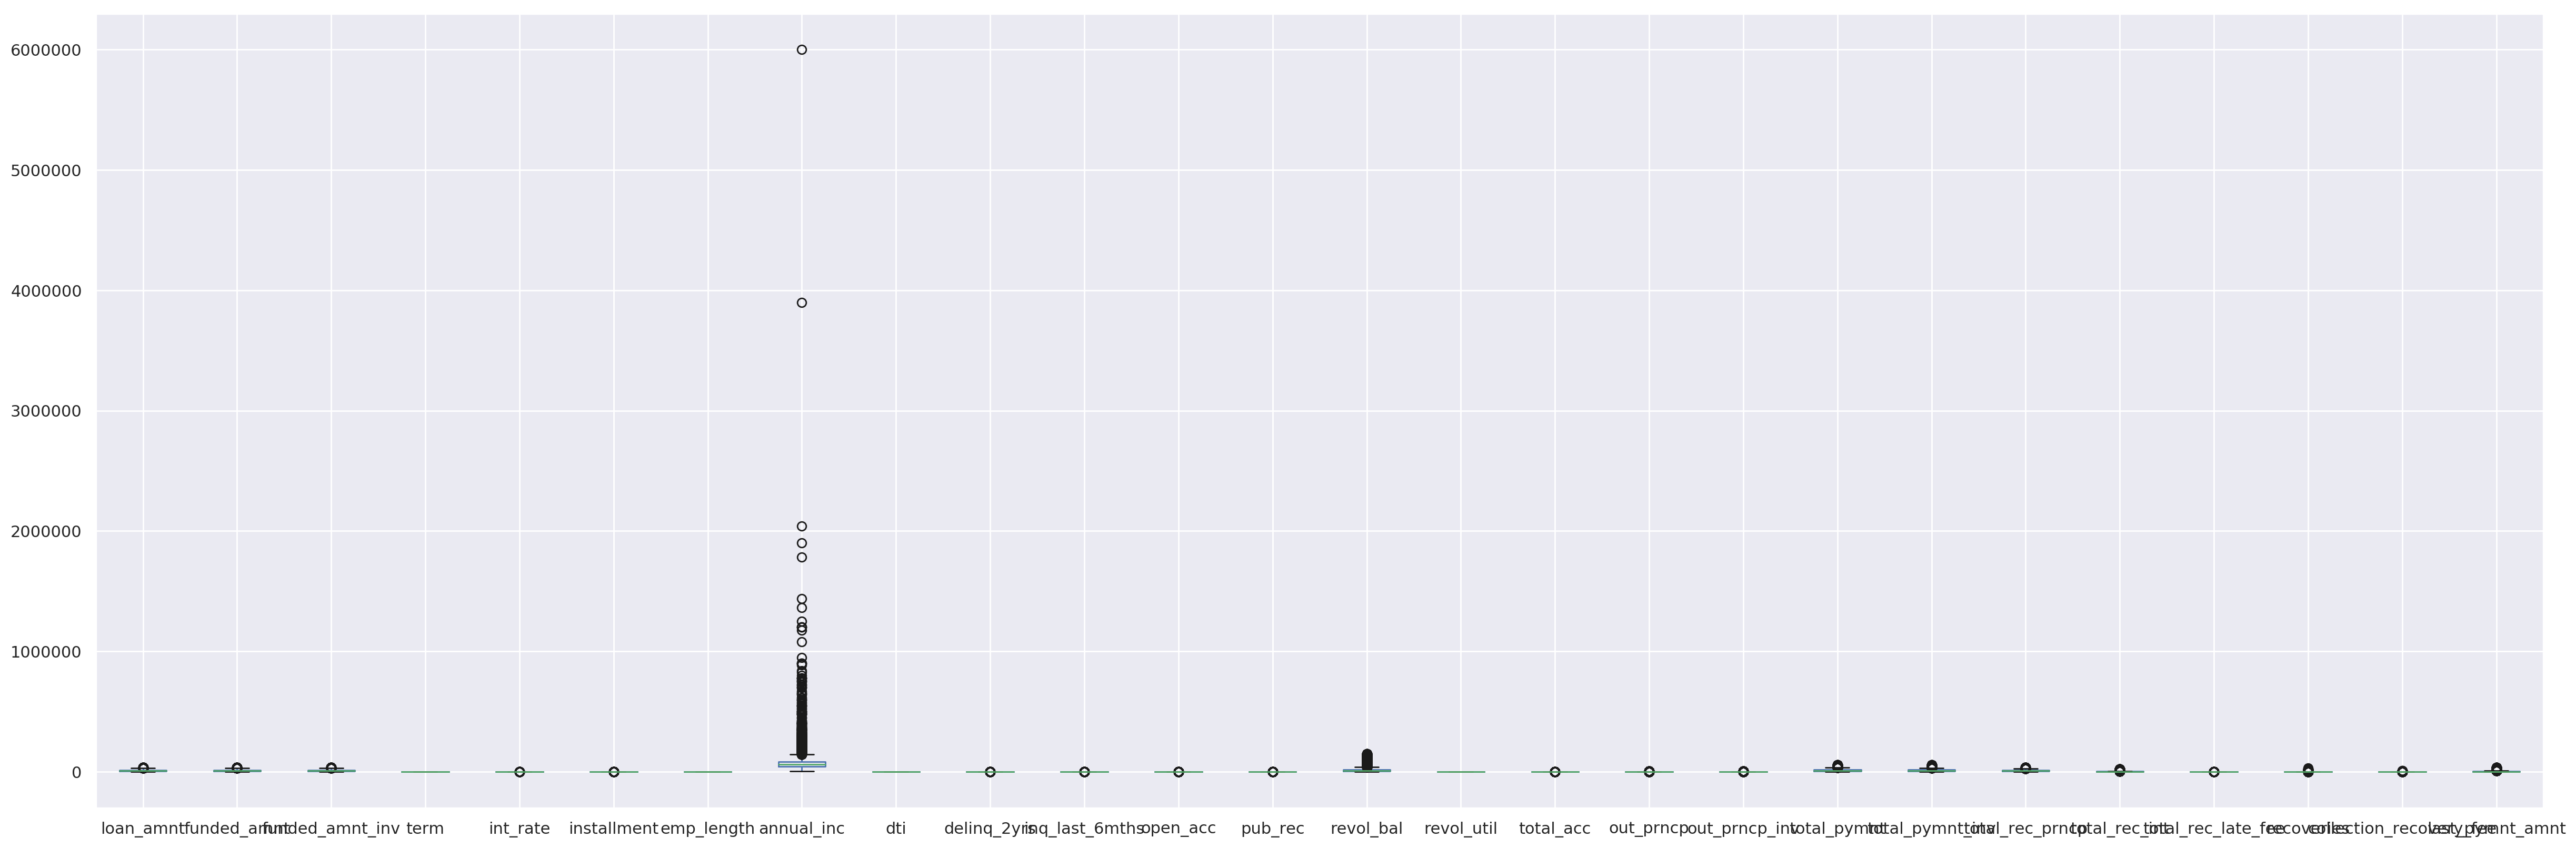

In [23]:
plt.figure(figsize=(30,10),dpi=200)
numeric_data.boxplot()

We can see annual_inc has potential outliers, it is understandable as some people have higher income than average like if this data contain record of some rich peoples

In [24]:
# Reference : https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame/46740476
print(numeric_data['annual_inc'].quantile([0.99]))

0.99    235000.0
Name: annual_inc, dtype: float64


In [25]:
numeric_data = numeric_data[numeric_data['annual_inc'] < 235000]
print(len(numeric_data))

38084


In [26]:
numeric_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,...,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000
mean,11223.159988,10951.151402,10402.349870,42.438609,0.120336,324.620267,5.089486,66147.798662,13.400561,0.145730,...,50.928334,50.683806,12174.626087,11587.368689,9813.018742,2265.799666,1.372680,94.435082,12.156593,2685.561299
std,7379.301154,7111.765467,7055.449071,10.633621,0.037089,206.395606,3.406025,35151.895672,6.647538,0.490414,...,373.692349,372.314963,8938.947783,8840.842452,6987.651747,2581.300974,7.338228,689.273826,147.529009,4428.773736
min,500.000000,500.000000,0.000000,36.000000,0.054200,15.690000,1.000000,4000.000000,0.000000,0.000000,...,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000
25%,5500.000000,5500.000000,5000.000000,36.000000,0.093200,168.402500,2.000000,41000.000000,8.310000,0.000000,...,0.000000,0.000000,5630.042125,5197.702500,4750.000000,672.947500,0.000000,0.000000,0.000000,222.840000
50%,10000.000000,9800.000000,9000.000000,36.000000,0.118600,281.530000,4.000000,59800.000000,13.500000,0.000000,...,0.000000,0.000000,9992.312409,9367.040000,8000.000000,1362.640000,0.000000,0.000000,0.000000,553.850000
75%,15000.000000,15000.000000,14400.000000,60.000000,0.145400,430.400000,9.000000,82000.000000,18.650000,0.000000,...,0.000000,0.000000,16534.569337,15808.662500,13676.020000,2840.505000,0.000000,0.000000,0.000000,3326.567500
max,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,10.000000,234996.000000,29.990000,11.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [27]:
numeric_data['revol_util'] = numeric_data['revol_util']*100

In [28]:
numeric_data['int_rate'] = numeric_data['int_rate']*100

In [29]:
numeric_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,...,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000,38084.000000
mean,11223.159988,10951.151402,10402.349870,42.438609,12.033604,324.620267,5.089486,66147.798662,13.400561,0.145730,...,50.928334,50.683806,12174.626087,11587.368689,9813.018742,2265.799666,1.372680,94.435082,12.156593,2685.561299
std,7379.301154,7111.765467,7055.449071,10.633621,3.708860,206.395606,3.406025,35151.895672,6.647538,0.490414,...,373.692349,372.314963,8938.947783,8840.842452,6987.651747,2581.300974,7.338228,689.273826,147.529009,4428.773736
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4000.000000,0.000000,0.000000,...,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000
25%,5500.000000,5500.000000,5000.000000,36.000000,9.320000,168.402500,2.000000,41000.000000,8.310000,0.000000,...,0.000000,0.000000,5630.042125,5197.702500,4750.000000,672.947500,0.000000,0.000000,0.000000,222.840000
50%,10000.000000,9800.000000,9000.000000,36.000000,11.860000,281.530000,4.000000,59800.000000,13.500000,0.000000,...,0.000000,0.000000,9992.312409,9367.040000,8000.000000,1362.640000,0.000000,0.000000,0.000000,553.850000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.540000,430.400000,9.000000,82000.000000,18.650000,0.000000,...,0.000000,0.000000,16534.569337,15808.662500,13676.020000,2840.505000,0.000000,0.000000,0.000000,3326.567500
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,234996.000000,29.990000,11.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [30]:
numeric_backup = numeric_data.copy()

In [31]:
categorical_data.columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

In [32]:
categorical_data.describe()

,grade,sub_grade,home_ownership,verification_status,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,initial_list_status,application_type
count,38475,38475,38475,38475,38475,38475,38475,38475,38475,38475,38475,38475
unique,7,35,5,3,3,1,38475,14,820,50,1,1
top,B,B3,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,100xx,CA,f,INDIVIDUAL
freq,11658,2832,18390,16380,32062,38475,1,18191,585,6884,38475,38475


In [33]:
categorical_data.drop(['pymnt_plan','url','zip_code','initial_list_status','application_type'],axis=1,inplace=True)
print(categorical_data.columns)

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state'],
      dtype='object')


/home/dettrax/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')

Add Date to categorical column

In [35]:
og_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38475 entries, 0 to 39665
Data columns (total 40 columns):
loan_amnt                  38475 non-null int64
funded_amnt                38475 non-null int64
funded_amnt_inv            38475 non-null float64
term                       38475 non-null int64
int_rate                   38475 non-null float64
installment                38475 non-null float64
grade                      38475 non-null object
sub_grade                  38475 non-null object
emp_length                 38475 non-null int64
home_ownership             38475 non-null object
annual_inc                 38475 non-null float64
verification_status        38475 non-null object
issue_d                    38475 non-null datetime64[ns]
loan_status                38475 non-null object
pymnt_plan                 38475 non-null object
url                        38475 non-null object
purpose                    38475 non-null object
zip_code                   38475 non-null object
a

In [36]:
og_data['issue_d'].iloc[0]

Timestamp('2011-12-01 00:00:00')

In [37]:
#Extract month
categorical_data['issue_mnth'] = og_data['issue_d'].map(lambda x : x.month)
#Extract year
categorical_data['issue_year'] = og_data['issue_d'].map(lambda x : x.year)

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
categorical_data.head()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,issue_mnth,issue_year
0,B,B2,RENT,Verified,Fully Paid,credit_card,AZ,12,2011
1,C,C4,RENT,Source Verified,Charged Off,car,GA,12,2011
2,C,C5,RENT,Not Verified,Fully Paid,small_business,IL,12,2011
3,C,C1,RENT,Source Verified,Fully Paid,other,CA,12,2011
4,B,B5,RENT,Source Verified,Current,other,OR,12,2011


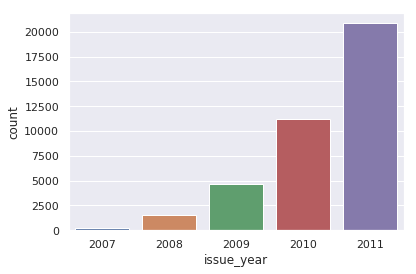

In [39]:
#Seperated issue year counts
sns.barplot(x="issue_year",y="count",data=categorical_data.groupby('issue_year')['issue_year'].count().reset_index(name= 'count'))

Let's start data analysis

In [40]:
#We will drop the current loan_status value and analyse "paid" and "default" ones.
analyse_cat = categorical_data[categorical_data['loan_status'] != 'Current']
analyse_num = numeric_data[numeric_data['loan_status'] != 'Current']

In [41]:
analyse_cat.columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'issue_mnth', 'issue_year'],
      dtype='object')

Question = How grades and sub grade of customers related to likelihood their payment?

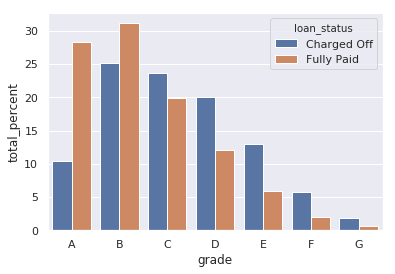

In [42]:
grade = analyse_cat.groupby(['loan_status','grade'])['grade'].count()
grade_percent = grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="grade",hue="loan_status",data=grade_percent)

There are more defaulters in from grade C to G

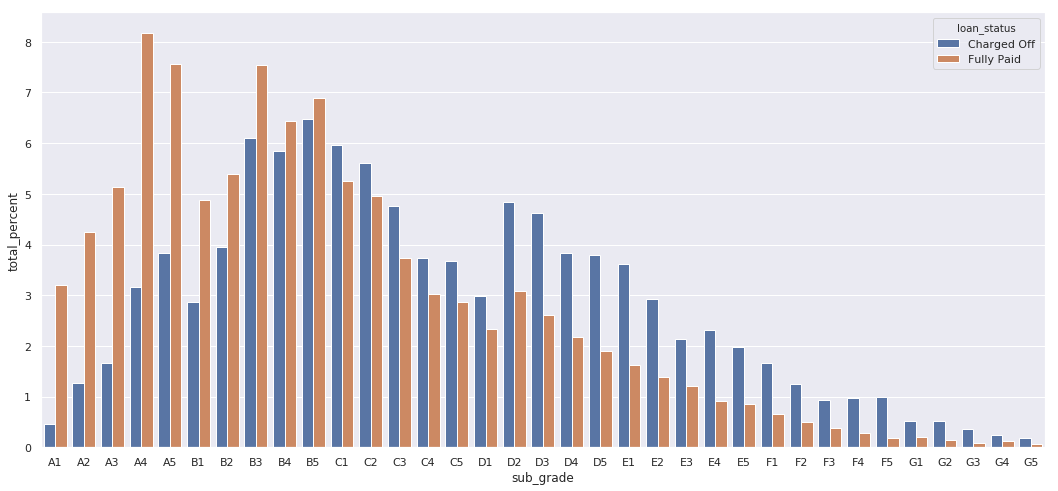

In [43]:
plt.figure(figsize=(18,8))
sub_grade = analyse_cat.groupby(['loan_status','sub_grade'])['sub_grade'].count()
sub_grade_percent = sub_grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="sub_grade",hue="loan_status",data=sub_grade_percent)

There are more defaulters in between sub_grade C1 and G5

Answer : Customers falling in between grade C and G are less likly to repay thier loan.

Question : How can people's home ownership effect their chances of loan repayment?

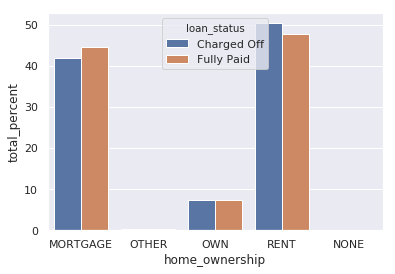

In [44]:
home_ownership = analyse_cat.groupby(['loan_status','home_ownership'])['home_ownership'].count()
home_ownership_percent = home_ownership.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="home_ownership",hue="loan_status",data=home_ownership_percent)

People staying on rent are more likely to default.
Answer : As people living in their own aparment are somewhat financially stable than people on rent, they are less likly to default. 

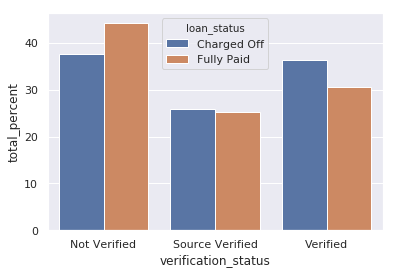

In [45]:
verification_status = analyse_cat.groupby(['loan_status','verification_status'])['verification_status'].count()
verification_status_percent = verification_status.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="verification_status",hue="loan_status",data=verification_status_percent)

We cannot see any significant difference here.

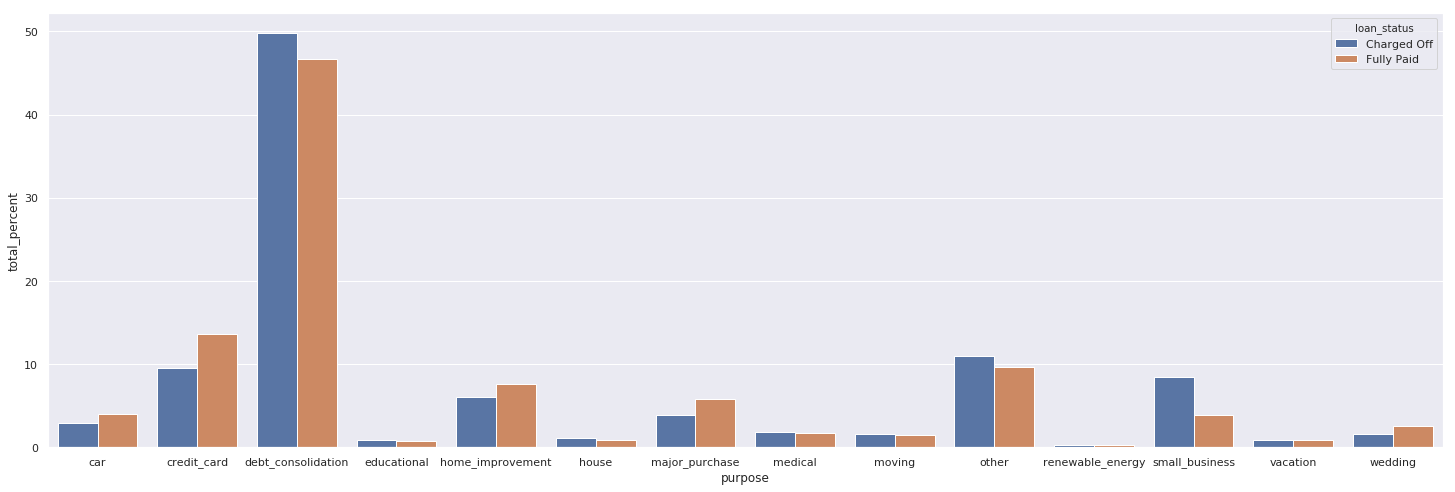

In [46]:
plt.figure(figsize=(25,8))
purpose = analyse_cat.groupby(['loan_status','purpose'])['purpose'].count()
purpose_percent = purpose.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="purpose",hue="loan_status",data=purpose_percent)

According to the data, loan taken to pay other loans or for small businesses are less likly to repay, but we cannot conclude anything.

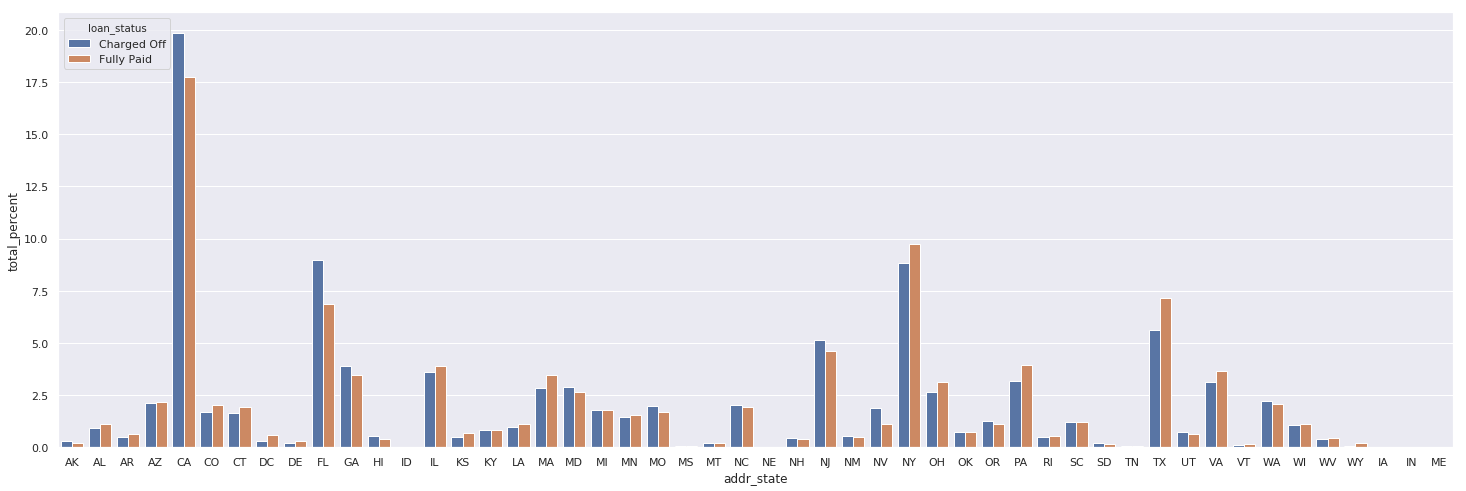

In [47]:
plt.figure(figsize=(25,8))
addr_state = analyse_cat.groupby(['loan_status','addr_state'])['addr_state'].count()
addr_state_percent = addr_state.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="addr_state",hue="loan_status",data=addr_state_percent)

We can see no pattern here.

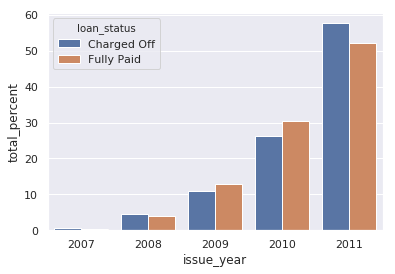

In [48]:
issue_year = analyse_cat.groupby(['loan_status','issue_year'])['issue_year'].count()
issue_year_percent = issue_year.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="issue_year",hue="loan_status",data=issue_year_percent)

We cannot see any pattern here

Numerical column analysis

In [49]:
analyse_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')

In [50]:
analyse_num['loan_amnt'].describe()

count    37000.000000
mean     11051.433108
std       7269.454331
min        500.000000
25%       5500.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [51]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
analyse_num['loan_amnt_cat'] = pd.cut(analyse_num['loan_amnt'], bins=bins, labels=labels)

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


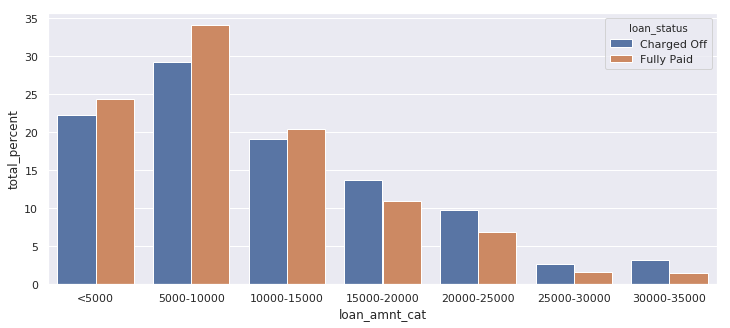

In [52]:
plt.figure(figsize=(12,5))
loan_amnt_cat = analyse_num.groupby(['loan_status','loan_amnt_cat'])['loan_amnt_cat'].count()
loan_amnt_cat_percent = loan_amnt_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="loan_amnt_cat",hue="loan_status",data=loan_amnt_cat_percent)

Questions : How does loan amount effect likelihood of defaulter?
Answer : From the data loan amount above than 15000 are more likly to default, but in real case we can't predict defaulter from only loan amount.

In [53]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
analyse_num['loan_funded_cat'] = pd.cut(analyse_num['funded_amnt'], bins=bins, labels=labels)
analyse_num['loan_funded_inv_cat'] = pd.cut(analyse_num['funded_amnt_inv'], bins=bins, labels=labels)

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


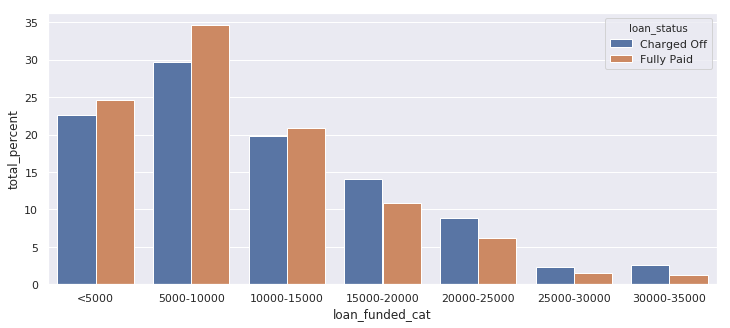

In [54]:
plt.figure(figsize=(12,5))
loan_funded_cat = analyse_num.groupby(['loan_status','loan_funded_cat'])['loan_funded_cat'].count()
funded_amnt_inv = analyse_num.groupby(['loan_status','loan_funded_inv_cat'])['loan_funded_inv_cat'].count()

loan_funded_cat_percent = loan_funded_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
loan_funded_inv_cat_percent = funded_amnt_inv.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="loan_funded_cat",hue="loan_status",data=loan_funded_cat_percent)

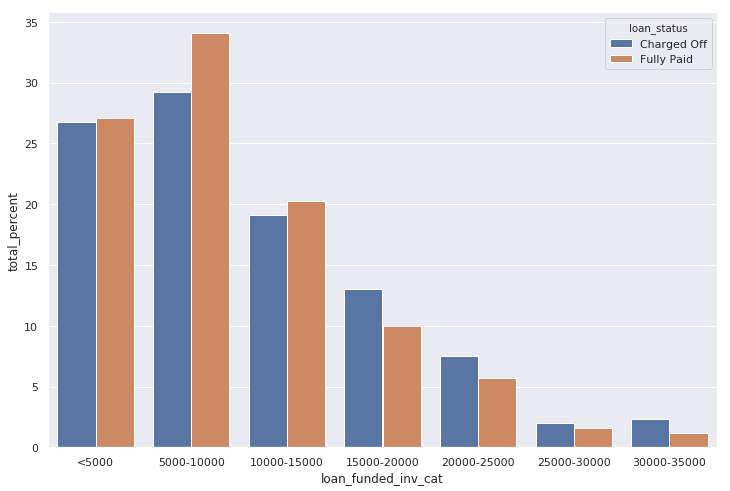

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(y="total_percent",x="loan_funded_inv_cat",hue="loan_status",data=loan_funded_inv_cat_percent)

funded_amnt and funded_amnt_inv are highly correlated with loan_amnt therefore we can drop this columns

In [56]:
analyse_num['int_rate'].describe()

count    37000.000000
mean        11.944693
std          3.675155
min          5.420000
25%          8.940000
50%         11.830000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


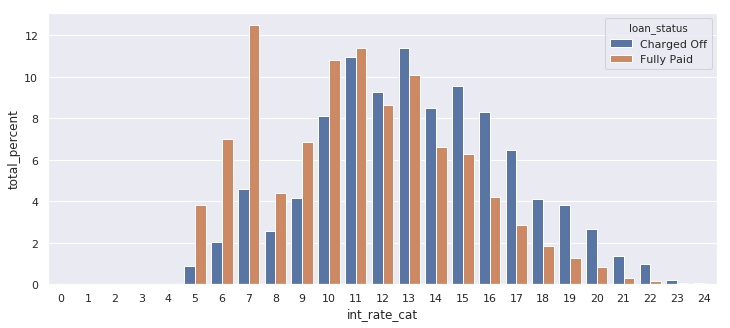

In [57]:
bins = [i for i in range(26)]
labels = [i for i in range(25)]
analyse_num['int_rate_cat'] = pd.cut(analyse_num['int_rate'], bins=bins, labels=labels)
plt.figure(figsize=(12,5))
int_rate_cat = analyse_num.groupby(['loan_status','int_rate_cat'])['int_rate_cat'].count()
int_rate_cat_percent = int_rate_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="int_rate_cat",hue="loan_status",data=int_rate_cat_percent)

Loan on interest rate greater than 11% are more likly to be default.

In [58]:
analyse_num['installment'].describe()

count    37000.000000
mean       322.528858
std        206.127582
min         15.690000
25%        167.340000
50%        279.160000
75%        425.227500
max       1305.190000
Name: installment, dtype: float64

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


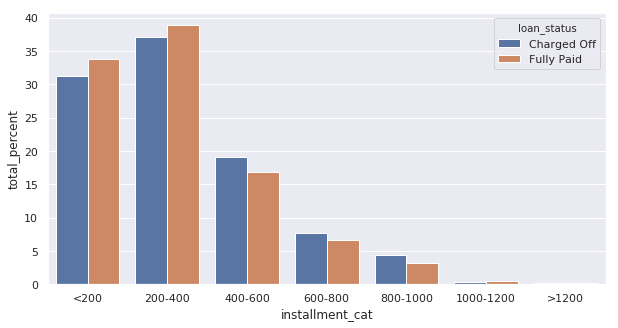

In [59]:
plt.figure(figsize=(10,5))
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
labels = [ '<200','200-400','400-600','600-800','800-1000','1000-1200','>1200']
analyse_num['installment_cat'] = pd.cut(analyse_num['installment'], bins=bins, labels=labels)
installment_cat = analyse_num.groupby(['loan_status','installment_cat'])['installment_cat'].count()
installment_cat_percent = installment_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="installment_cat",hue="loan_status",data=installment_cat_percent)

There is no pattern here, so I can't conclude anything.

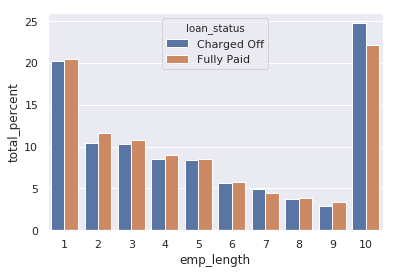

In [60]:
emp_length = analyse_num.groupby(['loan_status','emp_length'])['emp_length'].count()
emp_length_cat_percent = emp_length.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="emp_length",hue="loan_status",data=emp_length_cat_percent)

As we don't have data above 10 year, we can just say employee working for more than 10 years are more likly to default

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


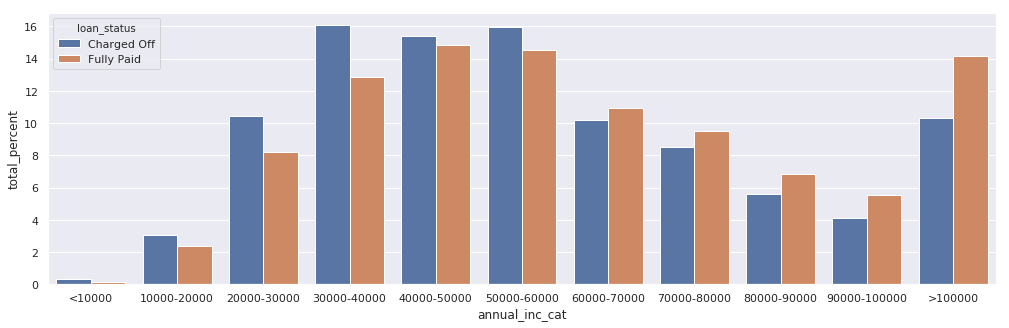

In [61]:
plt.figure(figsize=(17,5))
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 250000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','>100000']
analyse_num['annual_inc_cat'] = pd.cut(analyse_num['annual_inc'], bins=bins, labels=labels)
annual_inc_cat = analyse_num.groupby(['loan_status','annual_inc_cat'])['annual_inc_cat'].count()
annual_inc_cat_percent = annual_inc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x="annual_inc_cat",hue="loan_status",data=annual_inc_cat_percent)

Question : How does applicant's income determine the likelihood of him/her defaulting the loan?

Answer : Data shows annual income less than 50000 are more likely to default.

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


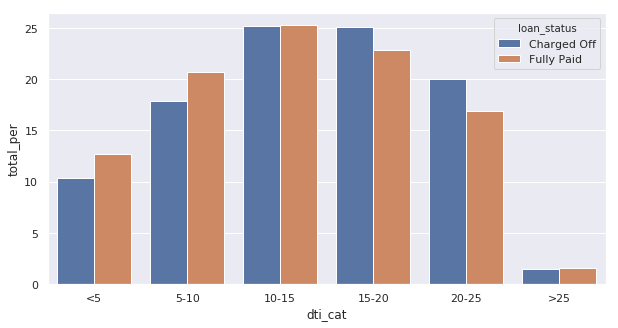

In [62]:
bins = [0, 5, 10, 15, 20, 25, 30]
labels = [ '<5','5-10','10-15','15-20','20-25','>25']
analyse_num['dti_cat'] = pd.cut(analyse_num['dti'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
dti_cat = analyse_num.groupby(['loan_status','dti_cat'])['dti_cat'].count()
dti_cat_per = dti_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(10,5))
sns.barplot(x='dti_cat', y='total_per', hue='loan_status',data=dti_cat_per)

Dti more than 15 have defaults.

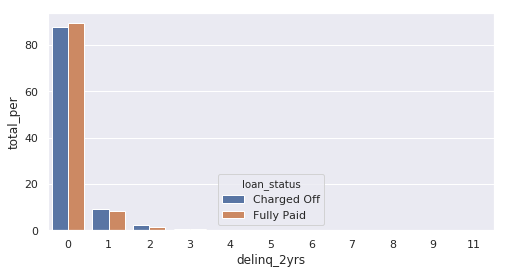

In [63]:
delinq_2yrs = analyse_num.groupby(['loan_status','delinq_2yrs'])['delinq_2yrs'].count()
delinq_2yrs_per = delinq_2yrs.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(8,4))
sns.barplot(x='delinq_2yrs', y='total_per', hue='loan_status',data=delinq_2yrs_per)

delinq_2yrs greater than 0 has more defaulters

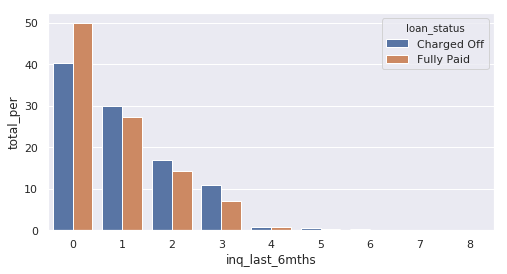

In [64]:
inq_last_6mths = analyse_num.groupby(['loan_status','inq_last_6mths'])['inq_last_6mths'].count()
inq_last_6mths_per = inq_last_6mths.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(8,4))
sns.barplot(x='inq_last_6mths', y='total_per', hue='loan_status',data=inq_last_6mths_per)

inq_last_6mths greater than 0 have more defaulters.

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


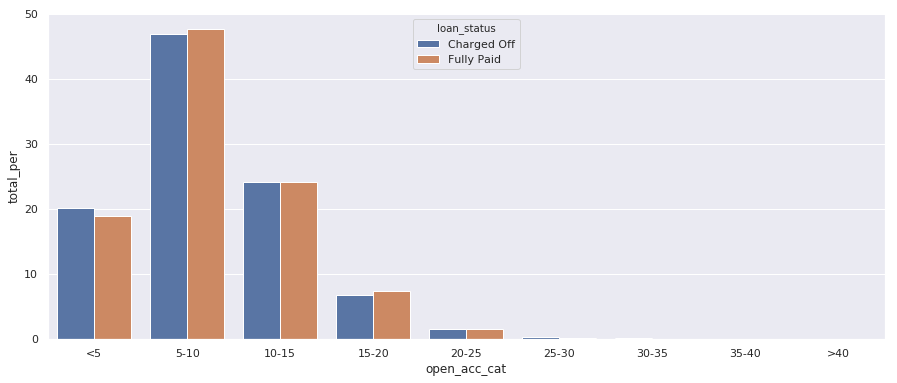

In [65]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = [ '<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','>40']
analyse_num['open_acc_cat'] = pd.cut(analyse_num['open_acc'], bins=bins, labels=labels)
open_acc_cat = analyse_num.groupby(['loan_status','open_acc_cat'])['open_acc_cat'].count()
open_acc_cat_per = open_acc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(15,6))
sns.barplot(x='open_acc_cat', y='total_per', hue='loan_status',data=open_acc_cat_per)

Open_acc more than 25 have more defaulters , and less than 5 has more defaulters.

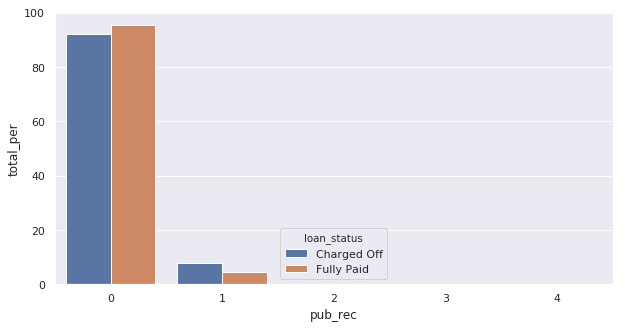

In [66]:
pub_rec = analyse_num.groupby(['loan_status','pub_rec'])['pub_rec'].count()
pub_rec_per = pub_rec.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(10,5))
sns.barplot(x='pub_rec', y='total_per', hue='loan_status',data=pub_rec_per)

pub_rec more than 0 has defaulters.

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


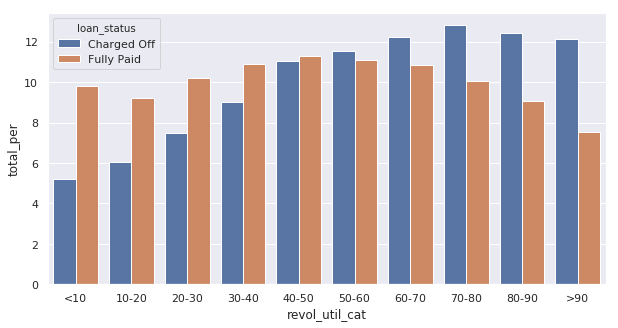

In [67]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
analyse_num['revol_util_cat'] = pd.cut(analyse_num['revol_util'], bins=bins, labels=labels)
revol_util_cat = analyse_num.groupby(['loan_status','revol_util_cat'])['revol_util_cat'].count()
revol_util_cat_per = revol_util_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(10,5))
sns.barplot(x='revol_util_cat', y='total_per', hue='loan_status',data=revol_util_cat_per)


revol_util more than 50 have defaulters.

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


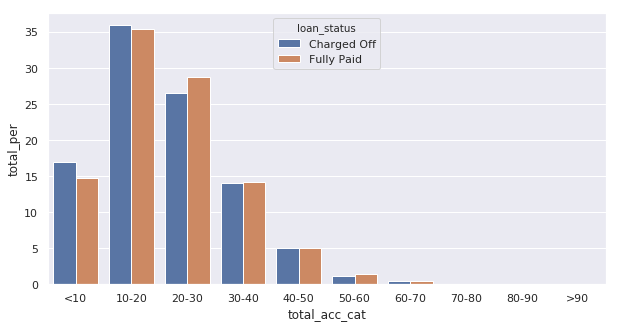

In [68]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
analyse_num['total_acc_cat'] = pd.cut(analyse_num['total_acc'], bins=bins, labels=labels)
total_acc_cat = analyse_num.groupby(['loan_status','total_acc_cat'])['total_acc_cat'].count()
total_acc_cat_per = total_acc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
plt.figure(figsize=(10,5))
sns.barplot(x='total_acc_cat', y='total_per', hue='loan_status',data=total_acc_cat_per)

There is no pattern here.
The out_prncp and out_prncp_inv contains single values so they won't contribute towards insights.

In [69]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')

If we are to predict future defaulters than they won't have total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int,total_rec_late_fee, recoviers,collection_recovery_fee, last_pymnt_amnt in thier data, so drop these columns.

/home/dettrax/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


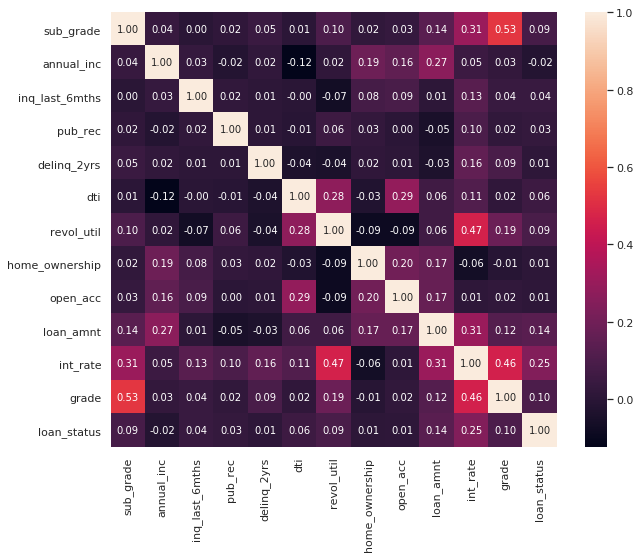

In [70]:
#So totally we have this columns based on EDA:

#Select the identified variables
og_data_final = og_data[['sub_grade','annual_inc','inq_last_6mths','pub_rec','delinq_2yrs','dti','revol_util','home_ownership','open_acc','loan_amnt','int_rate','grade','loan_status']]

#label encoding the category columns to find correlation 
labels, levels = pd.factorize(og_data_final.home_ownership)
og_data_final.home_ownership = labels

labels, levels = pd.factorize(og_data_final.grade)
og_data_final.grade = labels

labels, levels = pd.factorize(og_data_final.sub_grade)
og_data_final.sub_grade = labels

labels, levels = pd.factorize(og_data_final.loan_status)
og_data_final.loan_status = labels

plt.figure(figsize=(10,8))
sns.heatmap(og_data_final.corr(), annot=True, fmt=".2f")

Conclusion :
    
1> We can also drop sub_grade as it has correlation above threshold(which I took as 0.5) with grade, means grade will get the work for the model and we can drop sub_grade without effecting accuracy of model.

2> Annual income is negetively correlated with loan_status, so increase in annual income will result in less likelihood to be a defaulter.

3> grade , int_rate , loan_amnt features will contribute more about prediction on defaulter / not - defaulter

Lets build a model for predicting defaulters.

In [71]:
og_data_final.describe()

,sub_grade,annual_inc,inq_last_6mths,pub_rec,delinq_2yrs,dti,revol_util,home_ownership,open_acc,loan_amnt,int_rate,grade,loan_status
count,38475.000000,3.847500e+04,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000
mean,11.629032,6.964306e+04,0.869656,0.053281,0.146693,13.338617,0.490246,0.973125,9.326004,11311.444444,0.120487,1.749292,0.195218
std,7.576324,6.428838e+04,1.069617,0.233894,0.491918,6.663076,0.283015,0.966188,4.393903,7461.485373,0.037167,1.693903,0.462806
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,500.000000,0.054200,0.000000,0.000000
25%,5.000000,4.152000e+04,0.000000,0.000000,0.000000,8.220000,0.257000,0.000000,6.000000,5600.000000,0.093200,0.000000,0.000000
50%,12.000000,6.000000e+04,1.000000,0.000000,0.000000,13.420000,0.495000,1.000000,9.000000,10000.000000,0.118600,1.000000,0.000000
75%,16.000000,8.320000e+04,1.000000,0.000000,0.000000,18.600000,0.725000,2.000000,12.000000,15000.000000,0.145900,2.000000,0.000000
max,34.000000,6.000000e+06,8.000000,4.000000,11.000000,29.990000,0.999000,4.000000,44.000000,35000.000000,0.245900,6.000000,2.000000


In [72]:
og_data_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38475 entries, 0 to 39665
Data columns (total 13 columns):
sub_grade         38475 non-null int64
annual_inc        38475 non-null float64
inq_last_6mths    38475 non-null int64
pub_rec           38475 non-null int64
delinq_2yrs       38475 non-null int64
dti               38475 non-null float64
revol_util        38475 non-null float64
home_ownership    38475 non-null int64
open_acc          38475 non-null int64
loan_amnt         38475 non-null int64
int_rate          38475 non-null float64
grade             38475 non-null int64
loan_status       38475 non-null int64
dtypes: float64(4), int64(9)
memory usage: 4.1 MB


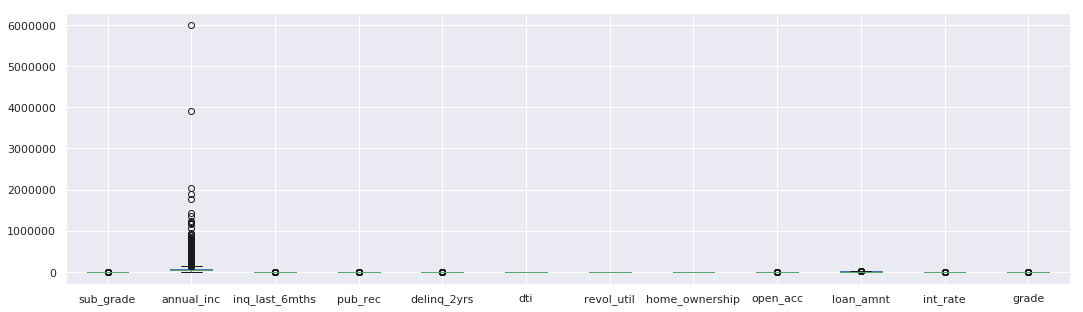

In [73]:
plt.figure(figsize=(18,5))
og_data_final.drop('loan_status',axis=1).boxplot()

In [74]:
og_data_final.describe()

,sub_grade,annual_inc,inq_last_6mths,pub_rec,delinq_2yrs,dti,revol_util,home_ownership,open_acc,loan_amnt,int_rate,grade,loan_status
count,38475.000000,3.847500e+04,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000,38475.000000
mean,11.629032,6.964306e+04,0.869656,0.053281,0.146693,13.338617,0.490246,0.973125,9.326004,11311.444444,0.120487,1.749292,0.195218
std,7.576324,6.428838e+04,1.069617,0.233894,0.491918,6.663076,0.283015,0.966188,4.393903,7461.485373,0.037167,1.693903,0.462806
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,500.000000,0.054200,0.000000,0.000000
25%,5.000000,4.152000e+04,0.000000,0.000000,0.000000,8.220000,0.257000,0.000000,6.000000,5600.000000,0.093200,0.000000,0.000000
50%,12.000000,6.000000e+04,1.000000,0.000000,0.000000,13.420000,0.495000,1.000000,9.000000,10000.000000,0.118600,1.000000,0.000000
75%,16.000000,8.320000e+04,1.000000,0.000000,0.000000,18.600000,0.725000,2.000000,12.000000,15000.000000,0.145900,2.000000,0.000000
max,34.000000,6.000000e+06,8.000000,4.000000,11.000000,29.990000,0.999000,4.000000,44.000000,35000.000000,0.245900,6.000000,2.000000


In [75]:
#We will remove outliers
annual_inc_quant = og_data_final['annual_inc'].quantile(0.99)
loan_amnt_quant = og_data_final['loan_amnt'].quantile(0.99)

In [76]:
og_data_final = og_data_final[(og_data_final['annual_inc'] < annual_inc_quant)]
og_data_final = og_data_final[(og_data_final['loan_amnt'] < loan_amnt_quant)]

In [77]:
og_data_final = og_data_final[(og_data_final['loan_status']==0) | (og_data_final['loan_status'] ==1)]

In [78]:
X = og_data_final.drop('loan_status',axis=1)
Y = og_data_final['loan_status']

In [79]:
X,Y = X.reset_index(),Y.reset_index() 
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36468 entries, 0 to 36467
Data columns (total 13 columns):
index             36468 non-null int64
sub_grade         36468 non-null int64
annual_inc        36468 non-null float64
inq_last_6mths    36468 non-null int64
pub_rec           36468 non-null int64
delinq_2yrs       36468 non-null int64
dti               36468 non-null float64
revol_util        36468 non-null float64
home_ownership    36468 non-null int64
open_acc          36468 non-null int64
loan_amnt         36468 non-null int64
int_rate          36468 non-null float64
grade             36468 non-null int64
dtypes: float64(4), int64(9)
memory usage: 3.6 MB


In [80]:
def normalise(x):
    return ( (x-np.min(x)) / (max(x) - min(x)))

#Normalising
Y.drop('index',axis=1,inplace=True)
X.drop('index',axis=1,inplace=True)
X = X.apply(normalise)

In [81]:
X.head()

,sub_grade,annual_inc,inq_last_6mths,pub_rec,delinq_2yrs,dti,revol_util,home_ownership,open_acc,loan_amnt,int_rate,grade
0,0.000000,0.086582,0.125,0.0,0.0,0.921974,0.837838,0.0,0.023810,0.131195,0.275553,0.000000
1,0.029412,0.112556,0.625,0.0,0.0,0.033344,0.094094,0.0,0.023810,0.058309,0.518967,0.166667
2,0.058824,0.035724,0.250,0.0,0.0,0.290764,0.985986,0.0,0.000000,0.055394,0.555321,0.166667
3,0.088235,0.195674,0.125,0.0,0.0,0.666889,0.210210,0.0,0.190476,0.276968,0.425184,0.166667
4,0.147059,0.138531,0.375,0.0,0.0,0.373458,0.283283,0.0,0.166667,0.131195,0.130664,0.333333


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:                24433
Model:                            GLM   Df Residuals:                    24420
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9245.1
Date:                Sun, 30 Jun 2019   Deviance:                       18490.
Time:                        15:19:48   Pearson chi2:                 2.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8761      0.073    -39.180      0.000      -3.020      -2.732
sub_grade          0.0205      0.095      0.215      0.829      -0.166       0.207
annual_inc        -2.2144      0.172    -12.906      0.000      -2.551      -1.878
inq_last_6mths     1.2160      0.140      8.658      0.000       0.941       1.491
pub_rec            0.8770      0.280      3.132      0.002       0.328       1.426
delinq_2yrs       -0.5286      0.414     -1.276      0.202      -1.340       0.283
dti               -0.0203      0.099     -0.205      0.838      -0.214       0.174
revol_util         0.2658      0.083      3.216      0.001       0.104       0.428
home_ownership     0.0870      0.085      1.027      0.304      -0.079       0.253
open_acc           0.2817      0.200      1.407      0.159      -0.111       0.674
loan_amnt          0.6340      0.110      5.789      0.000       0.419       0.849
int_rate           2.8935      0.146     19.806      0.000       2.607       3.180
grade             -0.0909      0.083     -1.101      0.271      -0.253       0.071
==================================================================================
"""

Taking 5% significance level we will drop less significant significance

We will use RFE to filter out most significant features

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X,Y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False  True  True  True  True False  True  True  True  True  True  True]
[3 1 1 1 1 2 1 1 1 1 1 1]


/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
cols = X.columns[rfe.support_]

In [85]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train[cols], y_train)

/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(x_train[cols])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:                24433
Model:                            GLM   Df Residuals:                    24422
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9245.2
Date:                Sun, 30 Jun 2019   Deviance:                       18490.
Time:                        15:19:49   Pearson chi2:                 2.42e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8786      0.067    -43.150      0.000      -3.009      -2.748
annual_inc        -2.2065      0.168    -13.147      0.000      -2.535      -1.878
inq_last_6mths     1.2142      0.140      8.657      0.000       0.939       1.489
pub_rec            0.8789      0.280      3.141      0.002       0.330       1.427
delinq_2yrs       -0.5298      0.414     -1.279      0.201      -1.342       0.282
revol_util         0.2595      0.078      3.316      0.001       0.106       0.413
home_ownership     0.0874      0.085      1.033      0.302      -0.078       0.253
open_acc           0.2663      0.185      1.438      0.150      -0.097       0.629
loan_amnt          0.6324      0.109      5.828      0.000       0.420       0.845
int_rate           2.9001      0.144     20.116      0.000       2.617       3.183
grade             -0.0833      0.075     -1.105      0.269      -0.231       0.064
==================================================================================
"""

In [87]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [88]:
vif_cal(input_data=og_data_final[cols].join(og_data_final['loan_status']), dependent_col='loan_status')

,Var,Vif
8,int_rate,14.33
0,annual_inc,5.67
4,revol_util,5.41
6,open_acc,5.17
7,loan_amnt,4.71
9,grade,2.53
5,home_ownership,2.22
1,inq_last_6mths,1.76
3,delinq_2yrs,1.15
2,pub_rec,1.07


Intrest rate has high multicollinearity, but I think we should keep that for now

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train[cols], y_train)

/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dettrax/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
#Evaluation
from sklearn import metrics
confusion = metrics.confusion_matrix( y_test, logsk.predict(x_test[cols]))
confusion

array([[10320,     7],
       [ 1700,     8]])

In [91]:
metrics.accuracy_score( y_test, logsk.predict(x_test[cols]))

0.8581636892397175

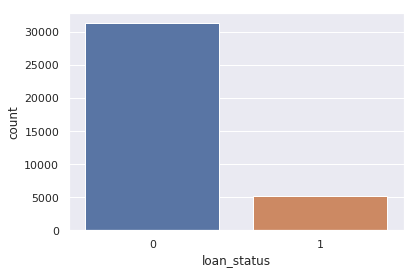

In [92]:
sns.countplot(Y['loan_status'])

We have a problem here, model accuracy is high but "false negetive" is too high that means it classify potential defaulters as not likly to default.

So we have to take care of the imbalanced data.

In [93]:
#Let's do oversampling
class_0_count = len(og_data_final[og_data_final['loan_status']==0])
class_1_count = len(og_data_final[og_data_final['loan_status']==1])

In [94]:
df_class_1_over = og_data_final[og_data_final['loan_status']==1].sample(class_0_count, replace=True)
df_test_over = pd.concat([og_data_final[og_data_final['loan_status']==0], df_class_1_over], axis=0)

In [95]:
X = df_test_over.drop('loan_status',axis=1)
Y = df_test_over['loan_status']
X,Y = X.reset_index(),Y.reset_index() 
def normalise(x):
    return ( (x-np.min(x)) / (max(x) - min(x)))

#Normalising
Y.drop('index',axis=1,inplace=True)
X.drop('index',axis=1,inplace=True)
X = X.apply(normalise)

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
logsk = RandomForestClassifier(n_estimators=20)
logsk.fit(x_train[cols], y_train)

/home/dettrax/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
#Evaluation
from sklearn import metrics
confusion = metrics.confusion_matrix( y_test, logsk.predict(x_test[cols]))
confusion

array([[ 9805,   678],
       [  136, 10062]])

In [99]:
metrics.accuracy_score( y_test, logsk.predict(x_test[cols]))

0.9606402011508147

In [100]:
#We can see we are getting good results on test data, Therefore we have a good model that can detect defaulters